In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats

<h1> Research Questions </h1>

In [2]:
with open('data/ex-man-export-1.json', 'r') as outfile:
    data1 = json.load(outfile)
with open('data/ex-man-export-2.json', 'r') as outfile:
    data2 = json.load(outfile)
with open('data/ex-man-export-3.json', 'r') as outfile:
    data3 = json.load(outfile)
with open('data/ex-man-export-4.json', 'r') as outfile:
    data4 = json.load(outfile)
with open('data/ex-man-export-5.json', 'r') as outfile:
    data5 = json.load(outfile)

dataset = [data1,data2,data3,data4,data5]

In [3]:
def create_focusDF(data):
    
    percentage_goals = []
    broken_Focus = []
    
    # transform json part to pandas dataframe
    df = pd.json_normalize(data["focusSessions"])
    
    # create new column, which calculates how long a user stayed in focus
    df["minutesInFocus"] = round((df["endTime"] - df["startTime"])/60000,2)
    
    # calculate percentage of achieved goals
    for index, row in df.iterrows():
        if len(row['goals']) == 0:
            percentage_goals.append(0)
        else:
            percentage_goals.append(round(len(row['completedGoals'])/len(row['goals']),2))
        
        if len(row["brokenFocus"]) == 0:
            broken_Focus.append(0)
        else:
            break_per_focus= 0
            for element in row["brokenFocus"]:
                if len(element) ==2:
                    break_per_focus += ((element[1]-element[0])/60000)
            broken_Focus.append(round(break_per_focus,2))
    df["brokenFocus"] = broken_Focus
            
            
    df["percentageCompletedGoals"] = percentage_goals
    
    
    
    # drop columns startTime, endTime, originalEndTime, goals and completedGoals
    df = df.drop(['startTime', 'endTime','originalEndTime','goals','completedGoals'], axis=1)
    return df

df1 = create_focusDF(data1)
df2 = create_focusDF(data2)
df3 = create_focusDF(data3)
df4 = create_focusDF(data4)
df5 = create_focusDF(data5)
    
    
    
focusdf = pd.concat([df1,df2,df3,df4,df5], keys=["df1", "df2", "df3", "df4","df5"])


In [4]:
df_survey1 =  pd.json_normalize(data1["randomSurveyResults"])
df_survey2 =  pd.json_normalize(data2["randomSurveyResults"])
df_survey3 =  pd.json_normalize(data3["randomSurveyResults"])
df_survey4 =  pd.json_normalize(data4["randomSurveyResults"])
df_survey5 =  pd.json_normalize(data5["randomSurveyResults"])

df_surveyframes= [df_survey1,df_survey2,df_survey3,df_survey4,df_survey5]

df_survey = pd.concat(df_surveyframes, keys=["a","b","c","d","e"])

In [5]:
focusdf

id  \
df1 0   c13f22e4-0bd5-48df-b3f7-ad8e624b65a8   
    1   bef13fc8-2d8a-41fe-a867-a8d5e20922ef   
    2   ba519481-9f2d-4fd4-8668-bc33f339c4d6   
df2 0   04ab8fc1-addb-4c2b-a2a3-55be0fcd5a84   
    1   88704f6f-a0e2-4a09-b058-2dea582c5d86   
...                                      ...   
df5 80  13339a7d-4bd0-42b1-8eb9-f3258da8ea5a   
    81  6e5450ce-f431-445e-8c54-b70c41a272a1   
    82  7a9fdea9-efd3-403d-9cd7-65ec29d656eb   
    83  3a40ee9c-213a-4f83-bc5c-b7e136dc238c   
    84  05cef8bb-ffee-43ea-ab18-a1f2810e5205   

                                                 services  brokenFocus  \
df1 0   [{'id': '7d6f5085-9e3c-4d54-b873-07b3b6fcc8c7'...         0.00   
    1   [{'id': '7d6f5085-9e3c-4d54-b873-07b3b6fcc8c7'...         0.00   
    2   [{'id': '7d6f5085-9e3c-4d54-b873-07b3b6fcc8c7'...         0.00   
df2 0   [{'id': '476c3b89-ad22-4c22-bdc9-9c90aec4960a'...         0.00   
    1   [{'id': '476c3b89-ad22-4c22-bdc9-9c90aec4960a'...         0.00   
...                                                   ...          ...   
df5 80  [{'id': '02866635-b2ff-41a0-bf78-2407924608ea'...         0.00   
    81  [{'id': '02866635-b2ff-41a0-bf78-2407924608ea'...         0.00   
    82  [{'id': '02866635-b2ff-41a0-bf78-2407924608ea'...         0.00   
    83  [{'id': '02866635-b2ff-41a0-bf78-2407924608ea'...        51.63   
    84  [{'id': '02866635-b2ff-41a0-bf78-2407924608ea'...         0.00   

        rating  scheduled                                      activeWindows  \
df1 0      4.0      False  [{'timestamp': 1603301228717, 'name': 'Gnome-t...   
    1      5.0      False  [{'timestamp': 1603303938906, 'name': 'exman',...   
    2      2.0      False  [{'timestamp': 1603726629784, 'name': 'exman',...   
df2 0      5.0      False  [{'timestamp': 1603366730107, 'name': 'exman',...   
    1      5.0      False  [{'timestamp': 1603371181878, 'name': 'Visual ...   
...        ...        ...                                                ...   
df5 80     0.0      False  [{'timestamp': 1604414962976, 'name': 'Teams.e...   
    81     5.0      False  [{'timestamp': 1604484383405, 'name': 'exman.e...   
    82     5.0      False  [{'timestamp': 1604489152182, 'name': 'Zoom.ex...   
    83     5.0      False  [{'timestamp': 1604505269953, 'name': 'exman.e...   
    84     5.0      False  [{'timestamp': 1604659024802, 'name': 'electro...   

       chatWorkRelated  minutesInFocus  percentageCompletedGoals  
df1 0              NaN            7.92                      1.00  
    1              NaN           17.76                      1.00  
    2            False           27.98                      0.33  
df2 0              NaN           30.00                      0.00  
    1              NaN           30.00                      0.00  
...                ...             ...                       ...  
df5 80           False           41.39                      0.00  
    81           False           56.45                      1.00  
    82           False           60.00                      0.00  
    83           False           52.34                      1.00  
    84           False            1.01                      1.00  

[107 rows x 9 columns]

<h3>RQ1: What is the effect of blocking notifications on productivity levels? </h3>

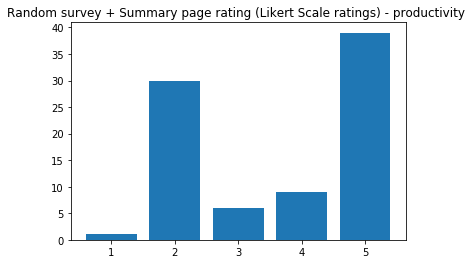

In [12]:
bins = np.unique(df_survey["productivity"])
plt.hist(df_survey["productivity"], bins, align="right",rwidth=0.8 )
plt.title("Random survey + Summary page rating (Likert Scale ratings) - productivity ")

plt.show()

In [7]:
bins

array([0, 1, 2, 3, 4, 5], dtype=int64)

<h3>RQ2: Is optional blocking of distractions and notifications enough to enable people to focus completely? 
</h3>

<h3>RQ3: How desirable are auto-response messages for knowledge workers? What are example situations where auto-response would be useful?  </h3>

C:\Users\lutha\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\lutha\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\lutha\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


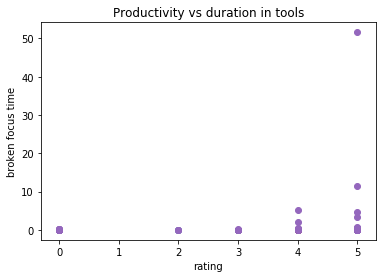

In [8]:
plt.scatter(df1["rating"],df1["brokenFocus"])
plt.scatter(df2["rating"],df2["brokenFocus"])
plt.scatter(df3["rating"],df3["brokenFocus"])
plt.scatter(df4["rating"],df4["brokenFocus"])
plt.scatter(df5["rating"],df5["brokenFocus"])

slope, intercept, r, p, stderr = scipy.stats.linregress(focusdf["rating"], focusdf["brokenFocus"])
plt.plot(focusdf["rating"], intercept + slope * focusdf["rating"])


plt.xlabel("rating")
plt.ylabel("broken focus time")
plt.title("Productivity vs duration in tools")

plt.show()

<h3>RQ4: OPTIONAL: How was the app used? What is the timing of the start and length of focus sessions? </h3>

<h3> RQ5: What are the biggest impacts on goal achievement and productivity levels? (breaking focus time, focus session length, goal setting practices etc) 
</h3>

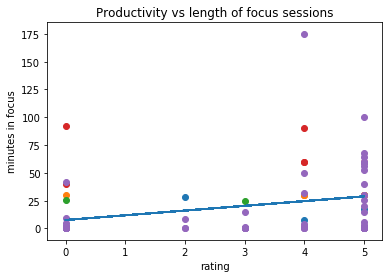

In [9]:
plt.scatter(df1["rating"],df1["minutesInFocus"])
plt.scatter(df2["rating"],df2["minutesInFocus"])
plt.scatter(df3["rating"],df3["minutesInFocus"])
plt.scatter(df4["rating"],df4["minutesInFocus"])
plt.scatter(df5["rating"],df5["minutesInFocus"])


focusdf['rating'].fillna(value=focusdf['rating'].mean(), inplace=True)

slope, intercept, r, p, stderr = scipy.stats.linregress(focusdf["rating"], focusdf["minutesInFocus"])
plt.plot(focusdf["rating"], intercept + slope * focusdf["rating"])


plt.xlabel("rating")
plt.ylabel("minutes in focus")
plt.title("Productivity vs length of focus sessions")

plt.show()

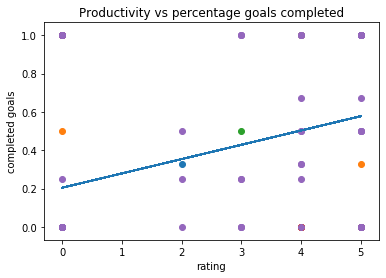

In [10]:
plt.scatter(df1["rating"],df1["percentageCompletedGoals"])
plt.scatter(df2["rating"],df2["percentageCompletedGoals"])
plt.scatter(df3["rating"],df3["percentageCompletedGoals"])
plt.scatter(df4["rating"],df4["percentageCompletedGoals"])
plt.scatter(df5["rating"],df5["percentageCompletedGoals"])

slope, intercept, r, p, stderr = scipy.stats.linregress(focusdf["rating"], focusdf["percentageCompletedGoals"])
plt.plot(focusdf["rating"], intercept + slope * focusdf["rating"])


plt.xlabel("rating")
plt.ylabel("completed goals")
plt.title("Productivity vs percentage goals completed")

plt.show()